In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  
pd.set_option('display.width', 1000)

In [ ]:
samples = pd.read_excel('../data/samples.xlsx', sheet_name=None)

colonnes_a_supprimer = [
    'id_client', 'CRTOC_AG_MVTAFF_IND_0010', 'CRTOC_IND_0010', 'CRTOC_IND_0164',
    'CRTOD_CMT_PRO_IND_0209', 'CRTOP_AG_IND_0038', 'CRTOP_IND_0038', 
    'CRTOU_CCT_PRO_IND_0209', 'DATCREENT', 'DATRLNORG', 'INDPARDCD', 
    'RATIO1', 'RATIO3', 'TOP_PRO_ACTIF', 'IND_ACTIF', 'IND_PER_PM', 
    'CODCMNIEE', 'CODPAY_NAISSANCE', 'CODPAY_NATIONALITE', 'CODPAY_RESIDENCE', 
    'CODSEXPRS', 'secteur_activite', 'secteur_activite_bis'
]

samples = samples
train = samples[list(samples.keys())[0]]
train = train.drop(columns=colonnes_a_supprimer)
test = samples[list(samples.keys())[1]]
test = test.drop(columns=colonnes_a_supprimer)
oot = samples[list(samples.keys())[2]] 
oot = oot.drop(columns=colonnes_a_supprimer)  
sample = pd.concat([train, test, oot], ignore_index=True)

In [29]:
sample.head()

,DDefaut_NDB,datdelhis,AGEPRS,ANCIENNETE,CODETAJUR,CODITDBDF_PRO,CODNAF2,CODTYPPRS,CRTAD_AG_MVTAFF_IND_0010,CRTAD_AG_NBECR_A,CRTAD_AG_NBECR_B,CRTAD_AG_NBJDE_BA,CRTAD_AG_NBJDE_BB,CRTAD_AG_NBJDE_BC,CRTAD_AG_SOLDE_IND_0009,CRTAD_AG_SOLDE_T,CRTAD_AG_SOLDE_T1,CRTAD_AG_SOLDE_T2,CRTAD_AG_SOLDE_T3,CRTAD_AG_SOLDE_T4,CRTAD_IND_0015,CRTAD_IND_0038,CRTAD_IND_0062,CRTAD_IND_0205,CRTAE_AG_SLDEPA,CRTAR_IND_0036,CRTOC_AG_LIGCRE_2T_IND_0009,CRTOC_AG_LIGCRE_IND_0009,CRTOC_AG_LIGDEB_2T_IND_0015,CRTOC_AG_LIGDEB_IND_0015,CRTOC_AG_MVTAFF_2T_IND_0010,CRTOC_AG_NBJCRE_2T_IND_0009,CRTOC_AG_NBJDEB_2T_IND_0015,CRTOC_AG_NBJDEB_IND_0015,CRTOC_IND_0015,CRTOC_IND_0301,CRTOC_MOY_MVTAFF_IND_0010,CRTOC_SLD_MOY,CRTOD_CMT_IND_0036,MINSOLDE_PAR,NBECR_PAR,CRTAD_IND_0042,CODACVPRO,DATCREPRSENT
0,0,202305,0,256,5499,0,6920Z,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5061894013,1103084518,0,0,122271661,182,0,0,0,0,22273386,27812604,0,0,0,0,0,2002-06-01
1,0,202301,0,16,5498,0,7022Z,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33100645,6430323,0,0,956444,184,0,0,0,0,405332,179895,0,0,0,0,0,2021-09-01
2,0,202303,0,22,5710,0,7022Z,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36707689,5820641,0,0,700000,184,0,0,0,0,300000,199498,0,0,0,0,0,2021-01-04
3,0,202305,0,85,5710,0,7022Z,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3957245204,728095628,0,0,6360000,182,0,0,0,0,393600,21743106,0,0,0,0,0,2016-03-25
4,0,202302,0,42,5710,0,6202A,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2213841782,399495826,0,0,4176900,184,0,0,0,0,1570800,12031749,0,0,0,0,0,2019-09-17


In [16]:
sample.describe()

,id_client,DDefaut_NDB,datdelhis,AGEPRS,ANCIENNETE,CODETAJUR,CODITDBDF_PRO,CODTYPPRS,CRTAD_AG_MVTAFF_IND_0010,CRTAD_AG_NBECR_A,...,MINSOLDE_PAR,NBECR_PAR,RATIO1,RATIO3,CRTAD_IND_0042,CODACVPRO,DATCREPRSENT,IND_ACTIF,CODCMNIEE,CODSEXPRS
count,2.623300e+04,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,2.623300e+04,26233.000000,...,2.623300e+04,26233.000000,26233.0,26233.0,26233.000000,26233.000000,19476,26233.0,6598.000000,26233.000000
mean,4.739303e+09,0.060001,202304.516792,12.859566,140.544162,4618.911829,0.012427,1.748485,4.867374e+05,27.836466,...,1.754465e+05,-0.380208,0.0,0.0,9.399802,854.826059,2012-09-18 10:14:20.628465920,1.0,65562.029858,0.351999
min,8.858000e+03,0.000000,202301.000000,0.000000,0.000000,1100.000000,0.000000,1.000000,0.000000e+00,0.000000,...,-2.550667e+07,-562.000000,0.0,0.0,0.000000,0.000000,1900-01-01 00:00:00,1.0,1004.000000,0.000000
25%,2.131180e+09,0.000000,202303.000000,0.000000,40.000000,1990.000000,0.000000,1.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,2008-10-21 18:00:00,1.0,40088.000000,0.000000
50%,4.575376e+09,0.000000,202305.000000,0.000000,94.000000,5499.000000,0.000000,2.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,2015-12-09 00:00:00,1.0,75112.000000,0.000000
75%,7.087516e+09,0.000000,202307.000000,25.000000,197.000000,5710.000000,0.000000,2.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.000000,2168.000000,2019-12-04 06:00:00,1.0,92073.000000,1.000000
max,9.599706e+09,1.000000,202308.000000,95.000000,883.000000,9900.000000,2.000000,2.000000,5.951200e+09,839.000000,...,1.708782e+08,608.000000,0.0,0.0,274.000000,9999.000000,2023-08-31 00:00:00,1.0,99999.000000,2.000000
std,2.789416e+09,0.237493,2.288198,23.166897,136.123990,1813.824408,0.157165,0.433892,3.726309e+07,73.758794,...,2.416895e+06,26.023791,0.0,0.0,25.254050,1583.126717,NaN,0.0,29680.691516,0.655042


In [25]:
missing_values = sample.isnull().sum()
missing_values

id_client                          0
DDefaut_NDB                        0
datdelhis                          0
AGEPRS                             0
ANCIENNETE                         0
CODETAJUR                          0
CODITDBDF_PRO                      0
CODNAF2                            0
CODTYPPRS                          0
CRTAD_AG_MVTAFF_IND_0010           0
CRTAD_AG_NBECR_A                   0
CRTAD_AG_NBECR_B                   0
CRTAD_AG_NBJDE_BA                  0
CRTAD_AG_NBJDE_BB                  0
CRTAD_AG_NBJDE_BC                  0
CRTAD_AG_SOLDE_IND_0009            0
CRTAD_AG_SOLDE_T                   0
CRTAD_AG_SOLDE_T1                  0
CRTAD_AG_SOLDE_T2                  0
CRTAD_AG_SOLDE_T3                  0
CRTAD_AG_SOLDE_T4                  0
CRTAD_IND_0015                     0
CRTAD_IND_0038                     0
CRTAD_IND_0062                     0
CRTAD_IND_0205                     0
CRTAE_AG_SLDEPA                    0
CRTAR_IND_0036                     0
C

In [9]:
import pandas as pd

# Chargement des données
samples = pd.read_excel('../data/samples.xlsx', sheet_name=None)

# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'id_client', 'CRTOC_AG_MVTAFF_IND_0010', 'CRTOC_IND_0010', 'CRTOC_IND_0164',
    'CRTOD_CMT_PRO_IND_0209', 'CRTOP_AG_IND_0038', 'CRTOP_IND_0038', 
    'CRTOU_CCT_PRO_IND_0209', 'DATCREENT', 'DATRLNORG', 'INDPARDCD', 
    'RATIO1', 'RATIO3', 'TOP_PRO_ACTIF', 'IND_ACTIF', 'IND_PER_PM', 
    'CODCMNIEE', 'CODPAY_NAISSANCE', 'CODPAY_NATIONALITE', 'CODPAY_RESIDENCE', 
    'CODSEXPRS', 'secteur_activite', 'secteur_activite_bis'
]

# Chargement des jeux de données
train = samples[list(samples.keys())[0]]
test = samples[list(samples.keys())[1]]
oot = samples[list(samples.keys())[2]] 

# Suppression des colonnes spécifiées dans chaque dataset
train = train.drop(columns=colonnes_a_supprimer)
test = test.drop(columns=colonnes_a_supprimer)
oot = oot.drop(columns=colonnes_a_supprimer)

# Concaténation des datasets train, test et oot
sample = pd.concat([train, test, oot], ignore_index=True)

# Vérification de la concaténation
print(sample.shape)  # Afficher le nombre de lignes et de colonnes
print(sample.head())  # Vérifier les premières lignes du dataset concaténé


(26233, 44)
   DDefaut_NDB  datdelhis  AGEPRS  ANCIENNETE  CODETAJUR  CODITDBDF_PRO CODNAF2  CODTYPPRS  CRTAD_AG_MVTAFF_IND_0010  CRTAD_AG_NBECR_A  CRTAD_AG_NBECR_B  CRTAD_AG_NBJDE_BA  CRTAD_AG_NBJDE_BB  CRTAD_AG_NBJDE_BC  CRTAD_AG_SOLDE_IND_0009  CRTAD_AG_SOLDE_T  CRTAD_AG_SOLDE_T1  CRTAD_AG_SOLDE_T2  CRTAD_AG_SOLDE_T3  CRTAD_AG_SOLDE_T4  CRTAD_IND_0015  CRTAD_IND_0038  CRTAD_IND_0062  CRTAD_IND_0205  CRTAE_AG_SLDEPA  CRTAR_IND_0036  CRTOC_AG_LIGCRE_2T_IND_0009  CRTOC_AG_LIGCRE_IND_0009  CRTOC_AG_LIGDEB_2T_IND_0015  CRTOC_AG_LIGDEB_IND_0015  CRTOC_AG_MVTAFF_2T_IND_0010  CRTOC_AG_NBJCRE_2T_IND_0009  CRTOC_AG_NBJDEB_2T_IND_0015  CRTOC_AG_NBJDEB_IND_0015  CRTOC_IND_0015  CRTOC_IND_0301  CRTOC_MOY_MVTAFF_IND_0010  CRTOC_SLD_MOY  CRTOD_CMT_IND_0036  MINSOLDE_PAR  NBECR_PAR  CRTAD_IND_0042  CODACVPRO DATCREPRSENT
0            0     202305       0         256       5499              0   6920Z          2                         0                 0                 0                  0         

In [10]:
print(sample.dtypes)

DDefaut_NDB                             int64
datdelhis                               int64
AGEPRS                                  int64
ANCIENNETE                              int64
CODETAJUR                               int64
CODITDBDF_PRO                           int64
CODNAF2                                object
CODTYPPRS                               int64
CRTAD_AG_MVTAFF_IND_0010                int64
CRTAD_AG_NBECR_A                        int64
CRTAD_AG_NBECR_B                        int64
CRTAD_AG_NBJDE_BA                       int64
CRTAD_AG_NBJDE_BB                       int64
CRTAD_AG_NBJDE_BC                       int64
CRTAD_AG_SOLDE_IND_0009                 int64
CRTAD_AG_SOLDE_T                        int64
CRTAD_AG_SOLDE_T1                       int64
CRTAD_AG_SOLDE_T2                       int64
CRTAD_AG_SOLDE_T3                       int64
CRTAD_AG_SOLDE_T4                       int64
CRTAD_IND_0015                          int64
CRTAD_IND_0038                    

### pour skip

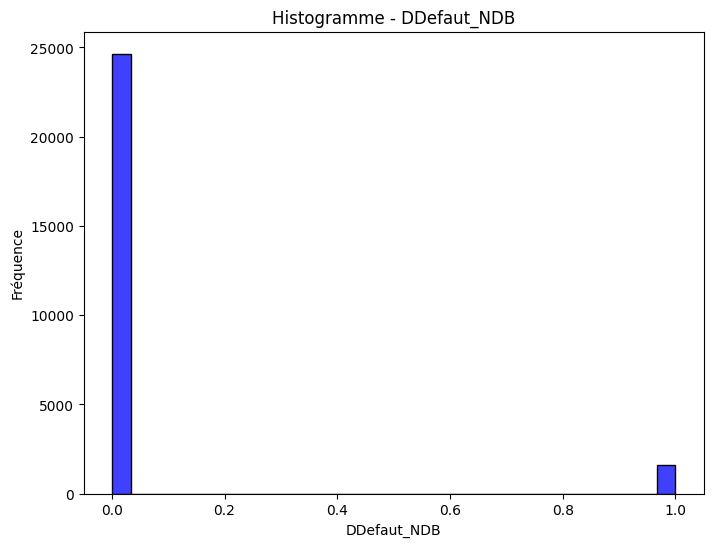

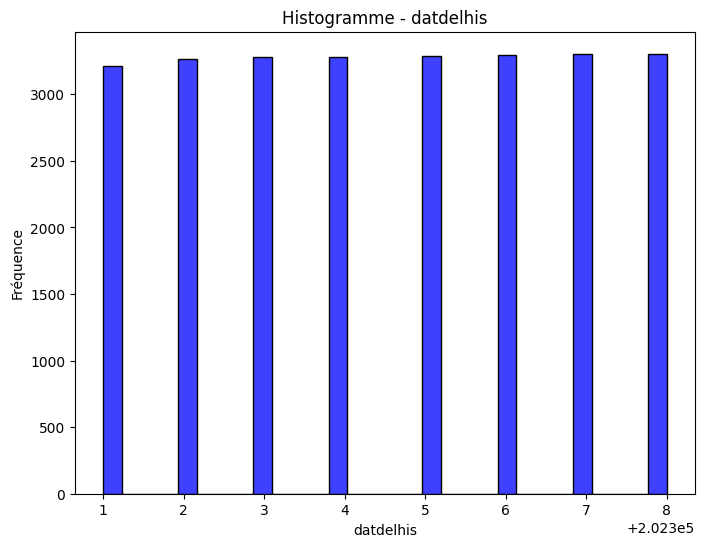

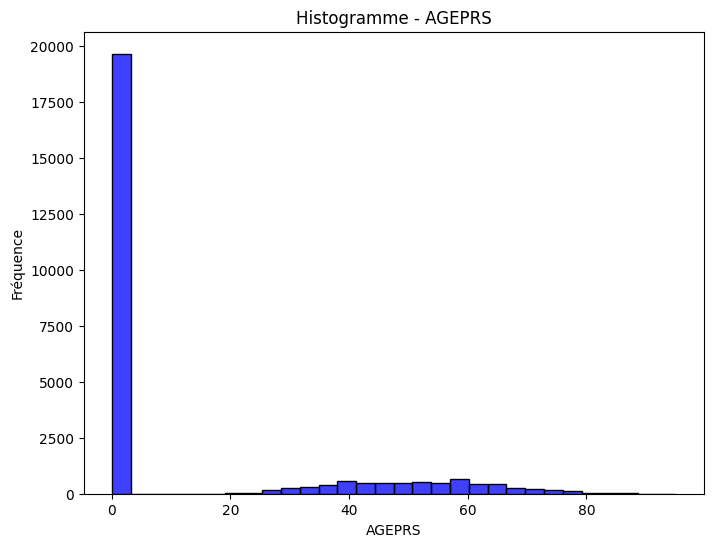

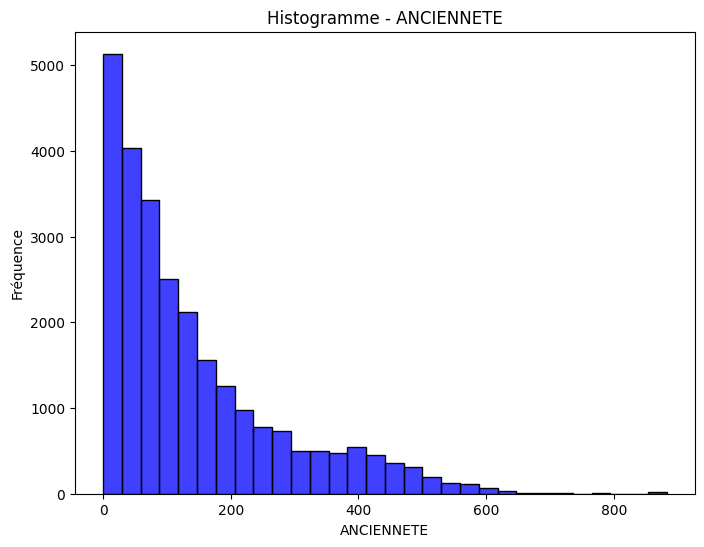

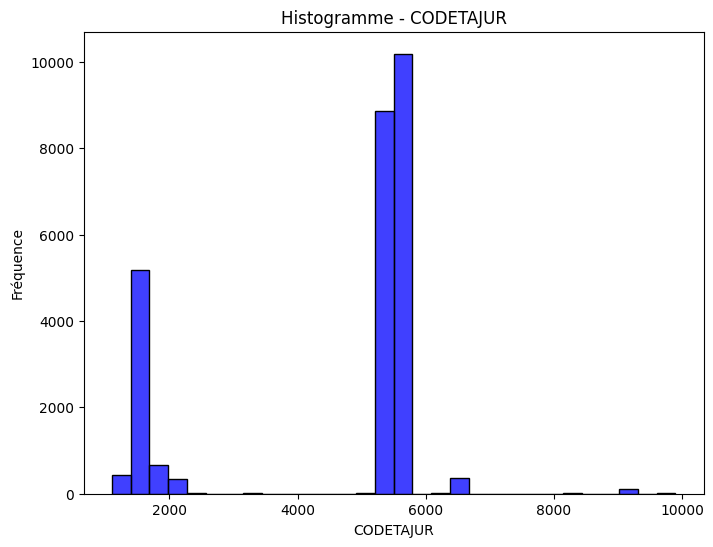

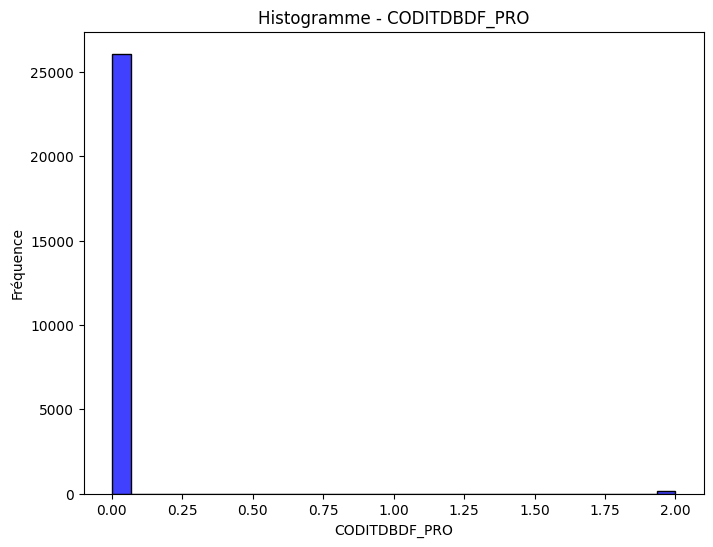

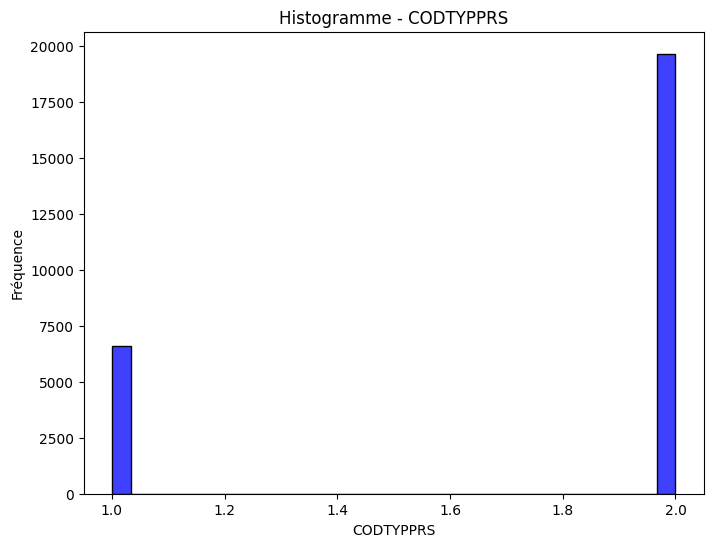

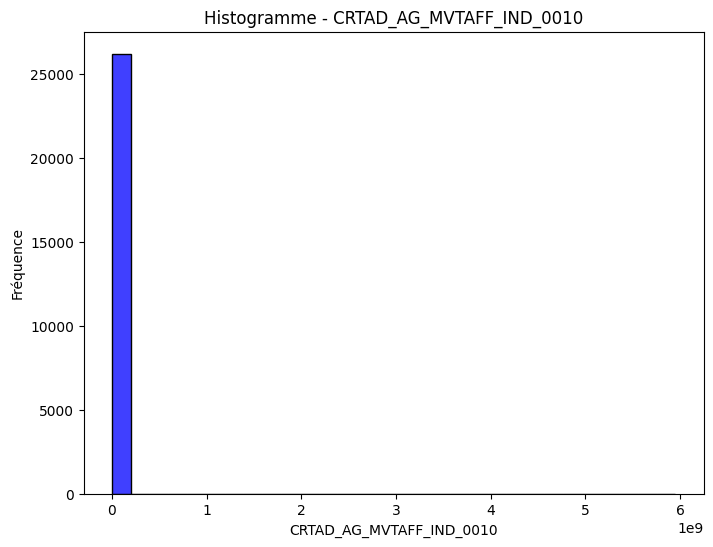

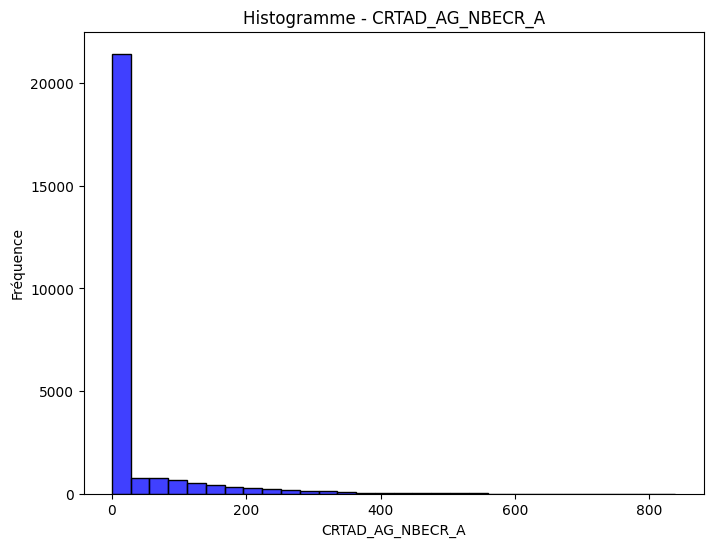

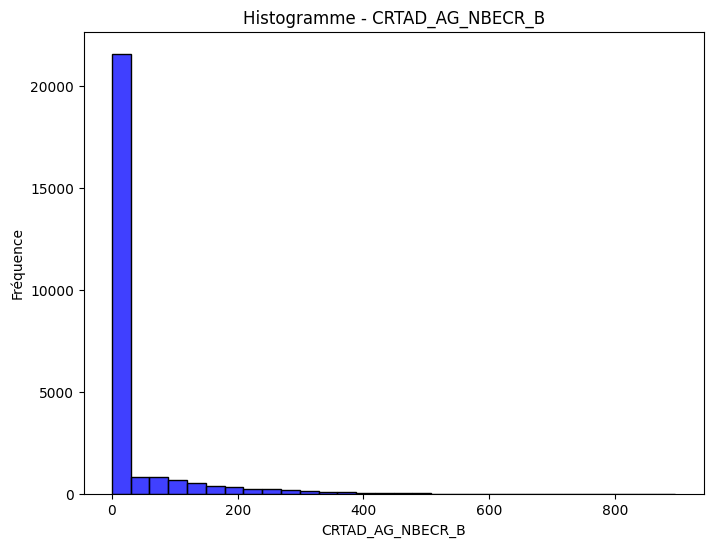

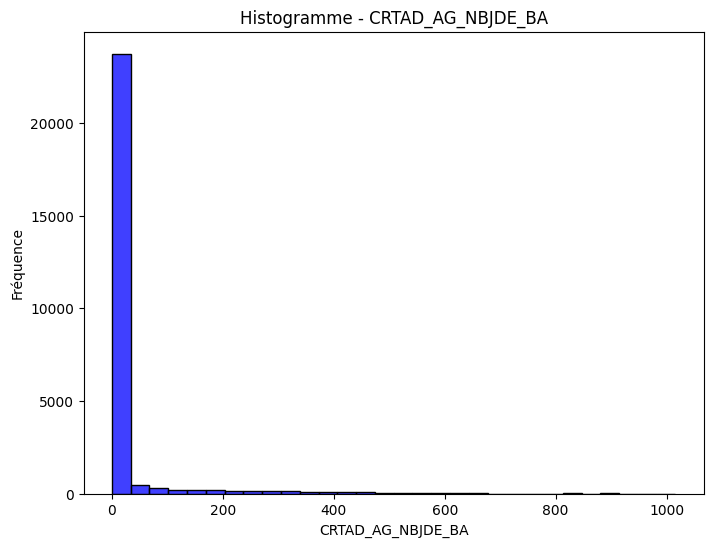

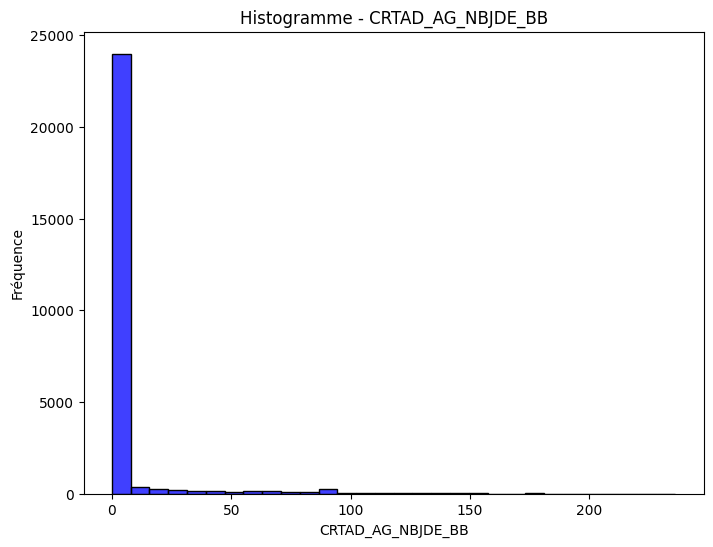

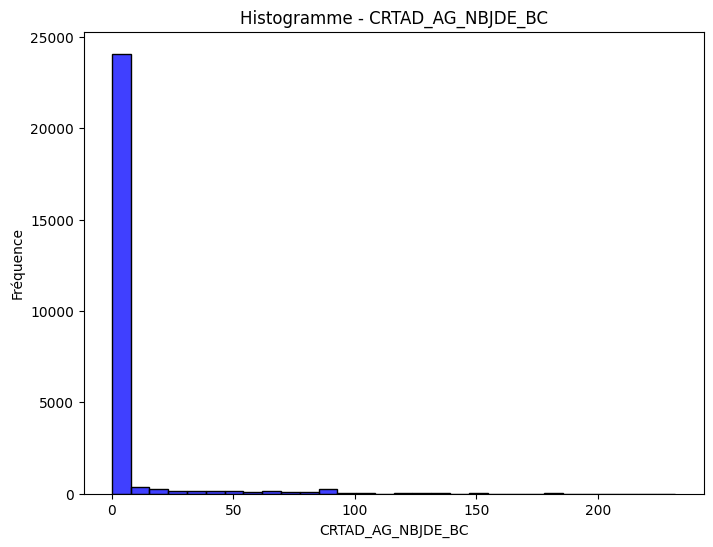

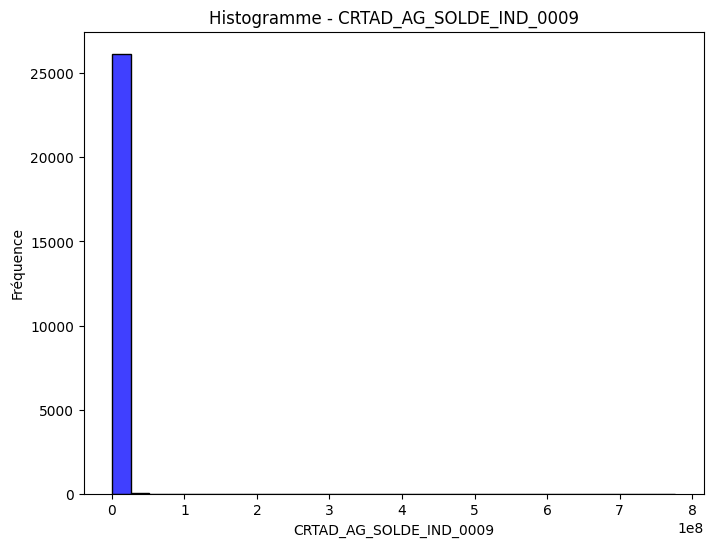

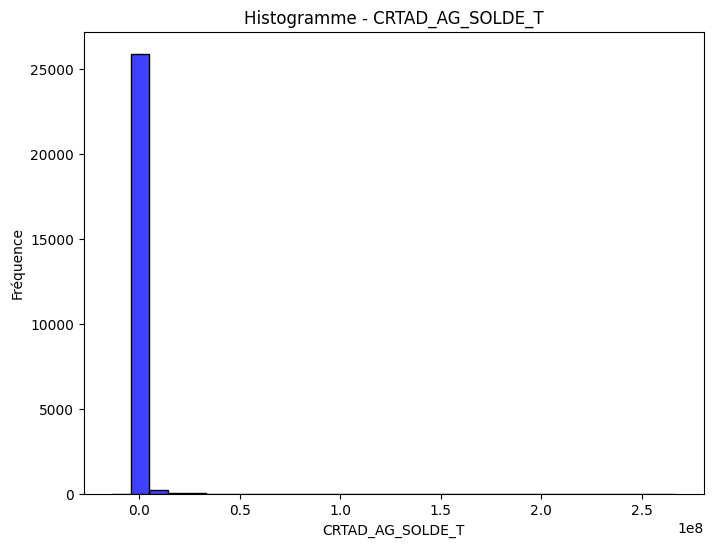

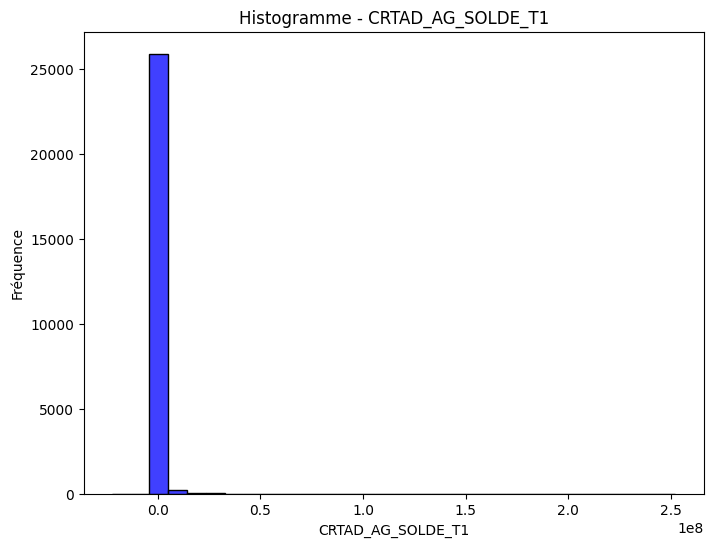

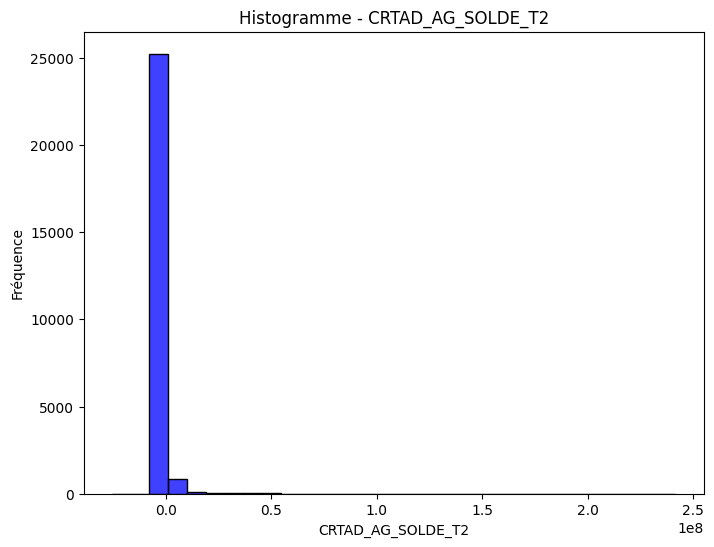

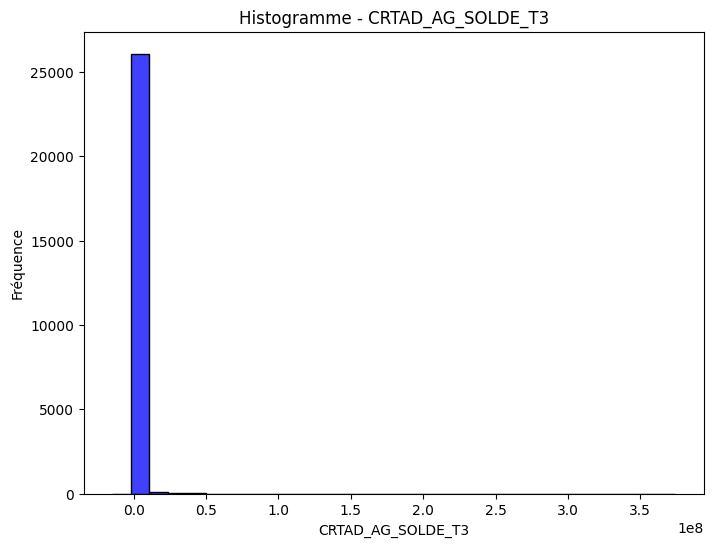

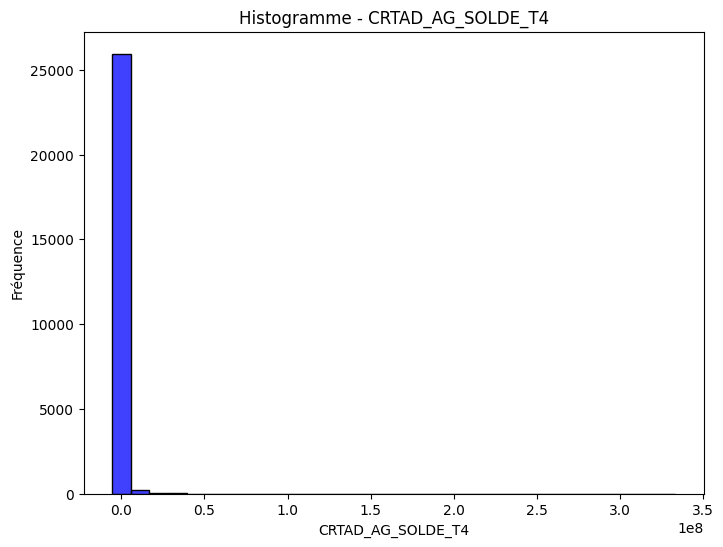

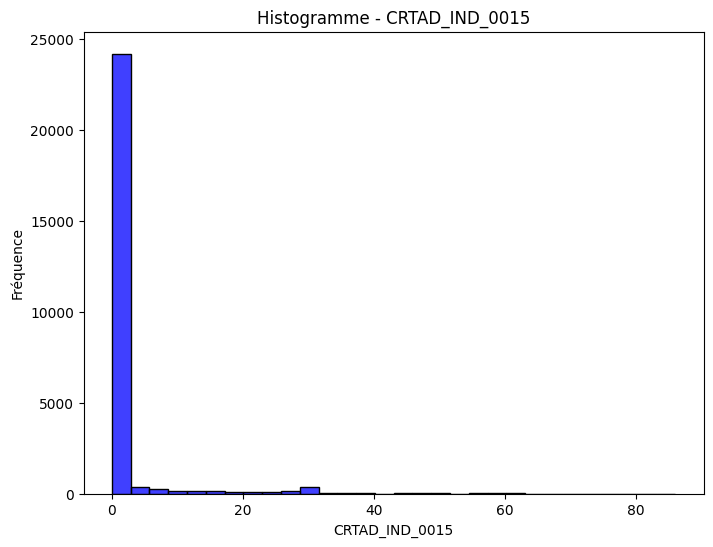

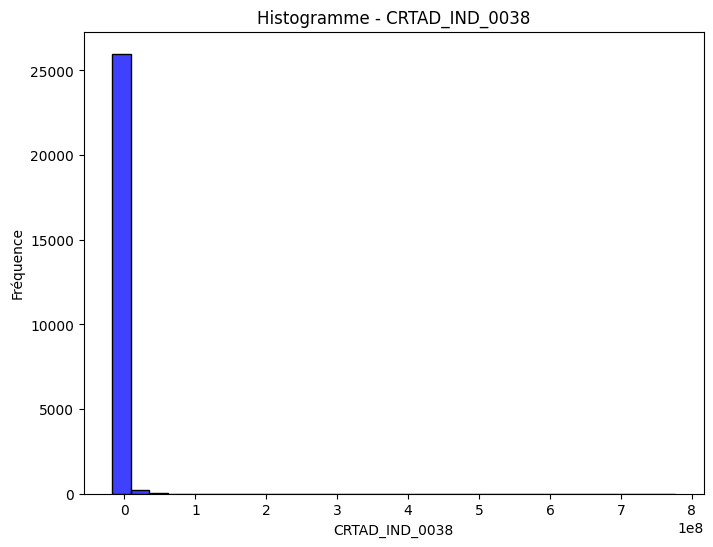

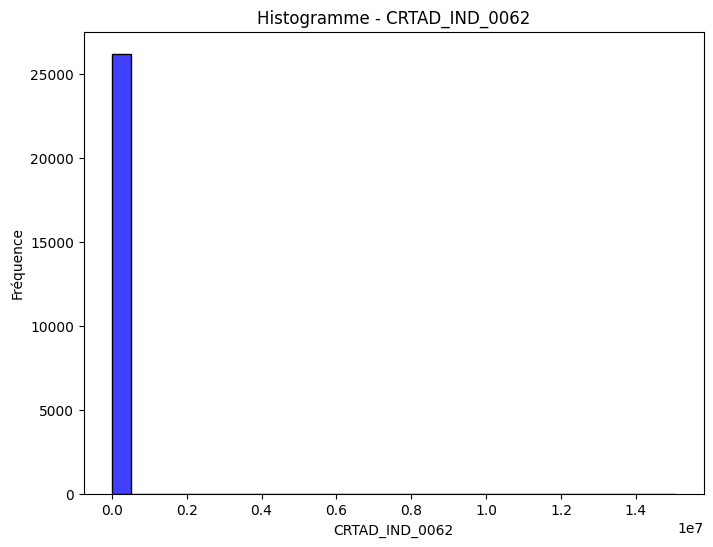

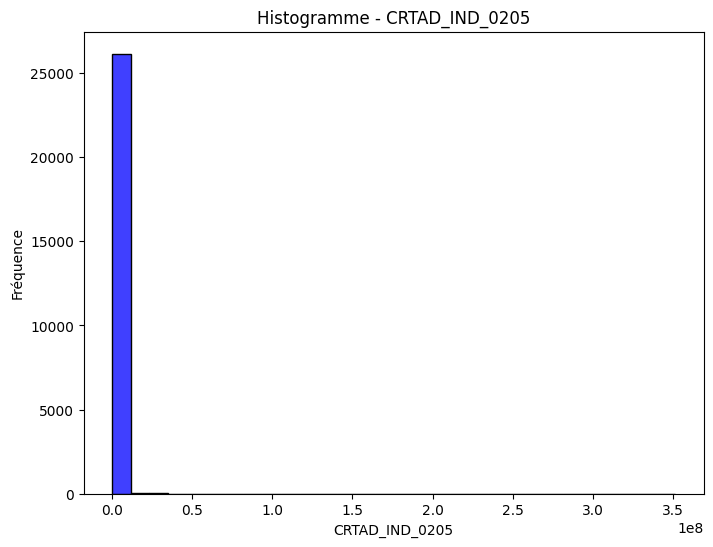

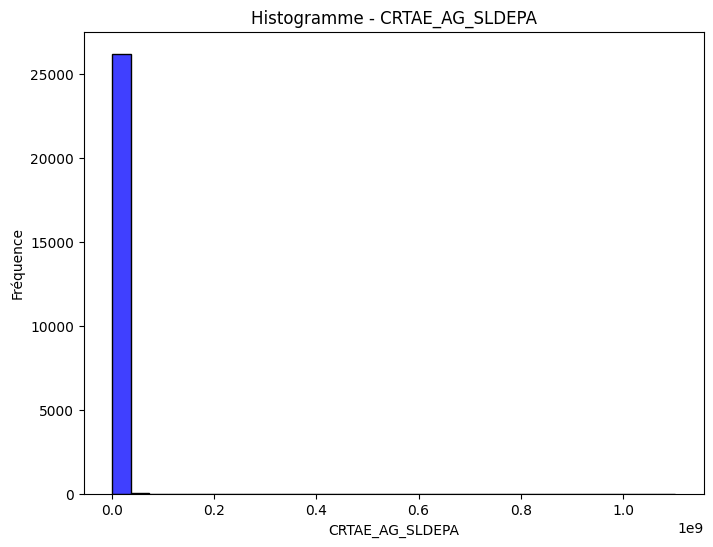

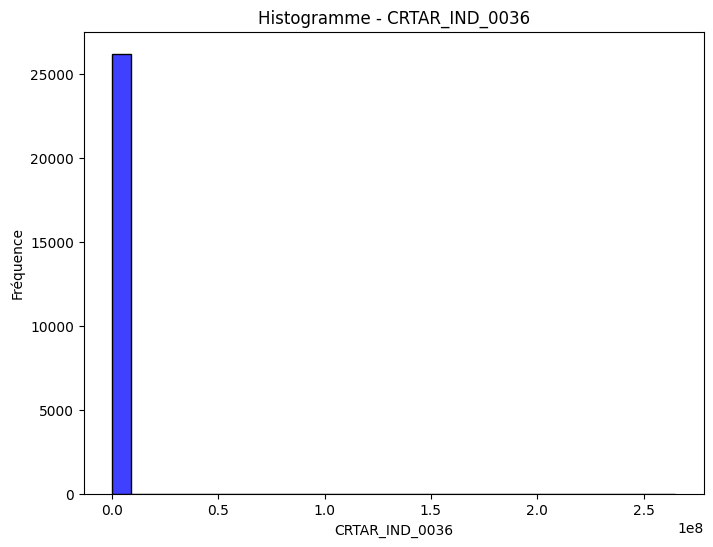

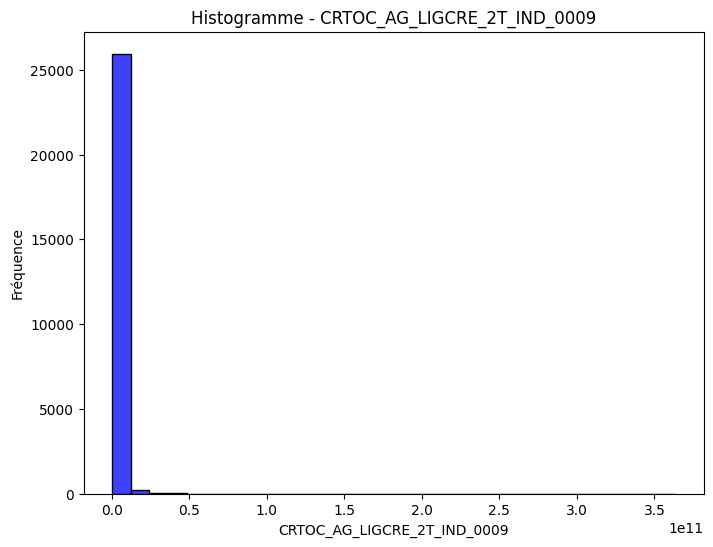

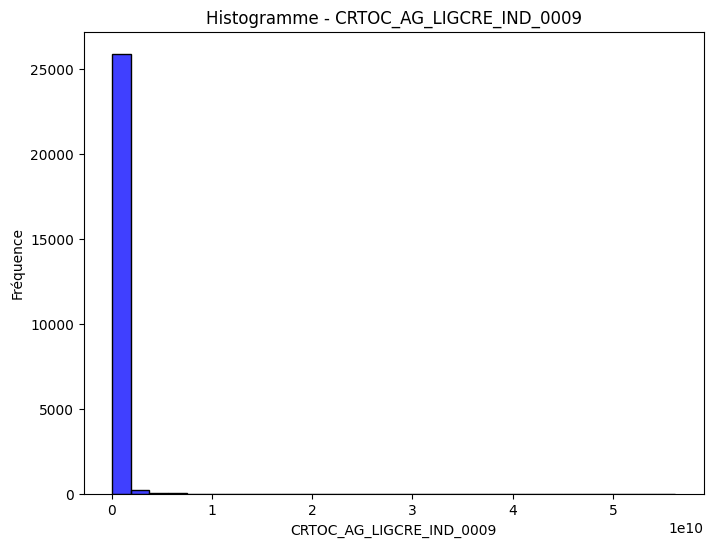

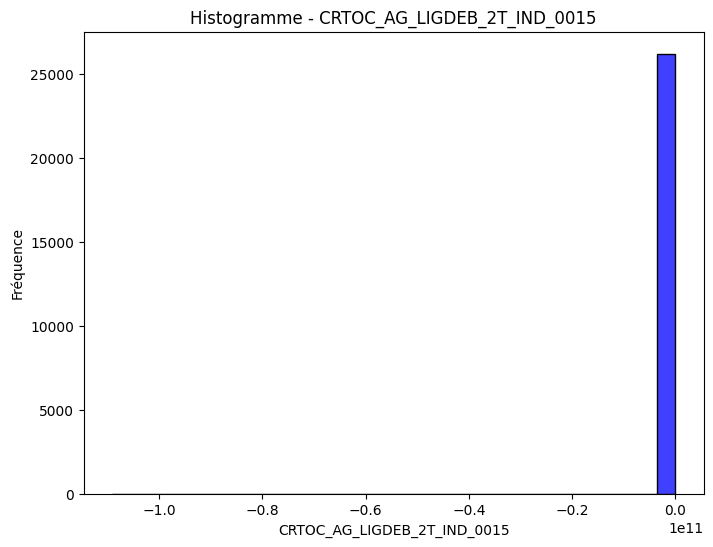

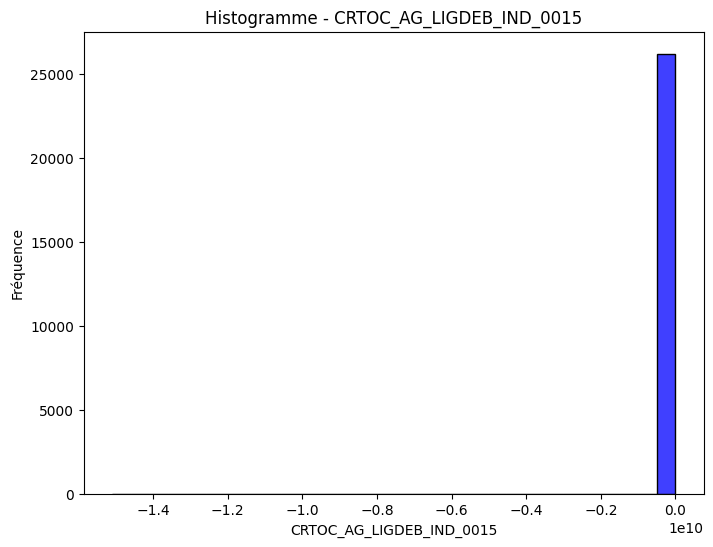

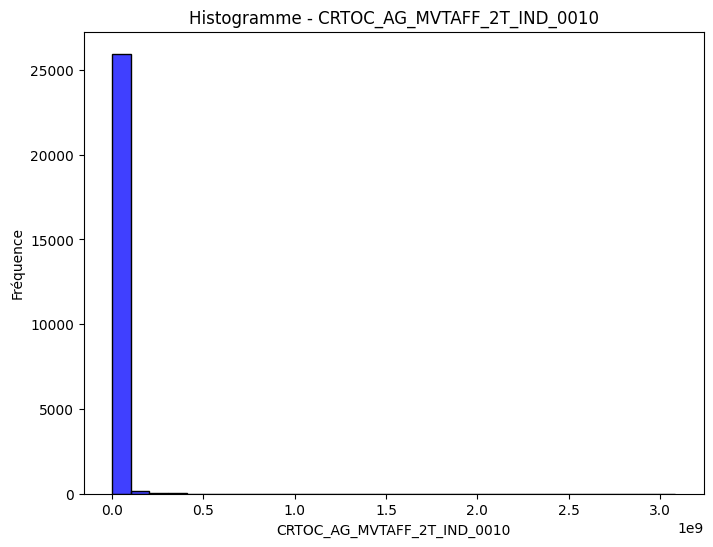

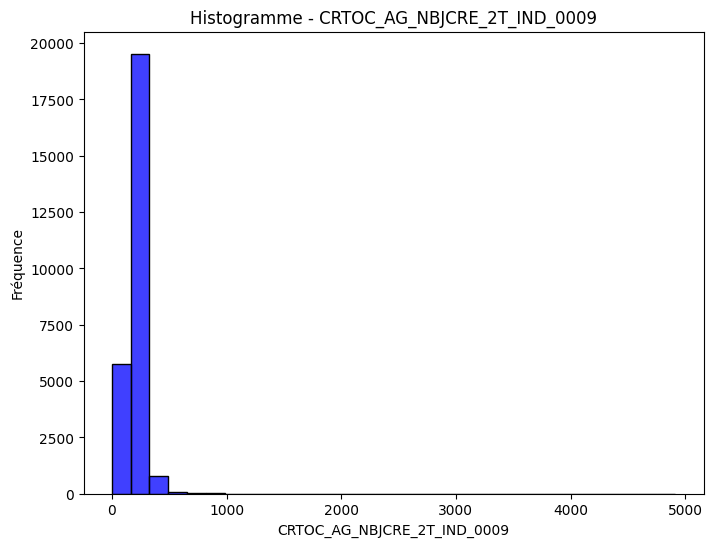

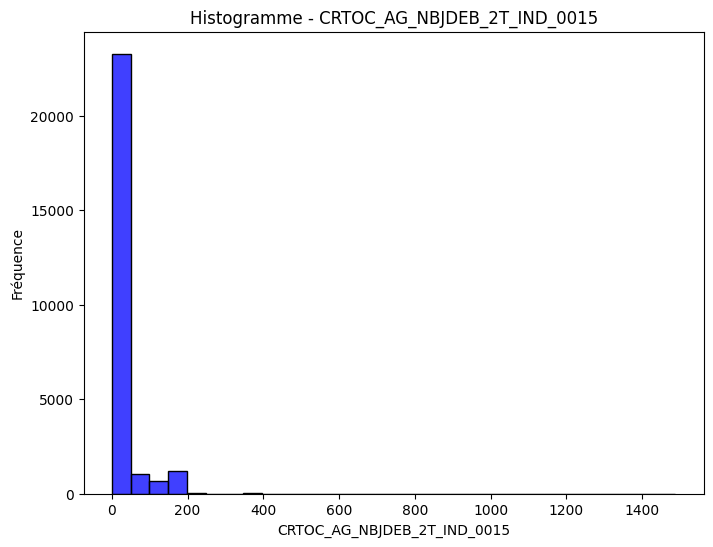

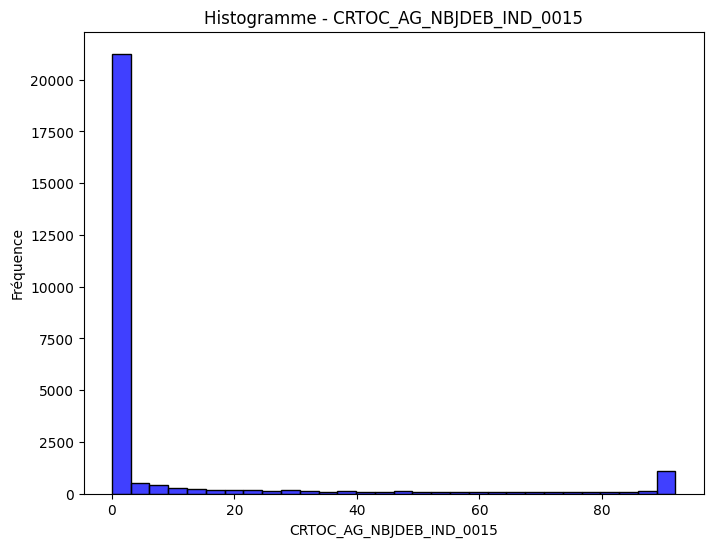

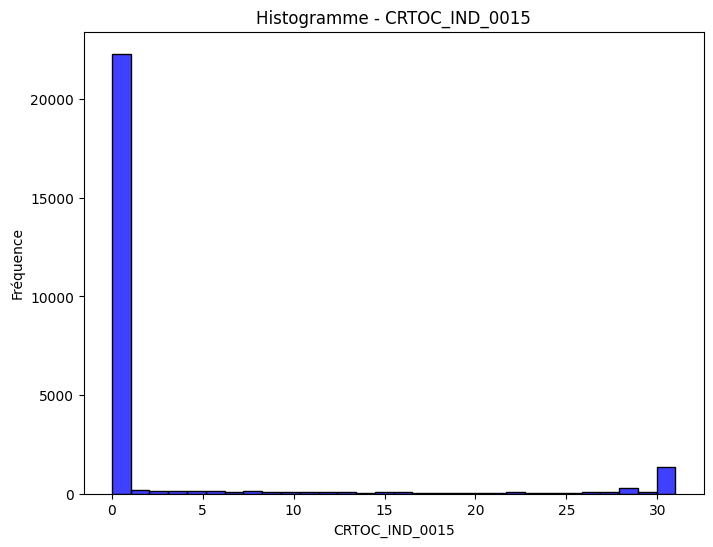

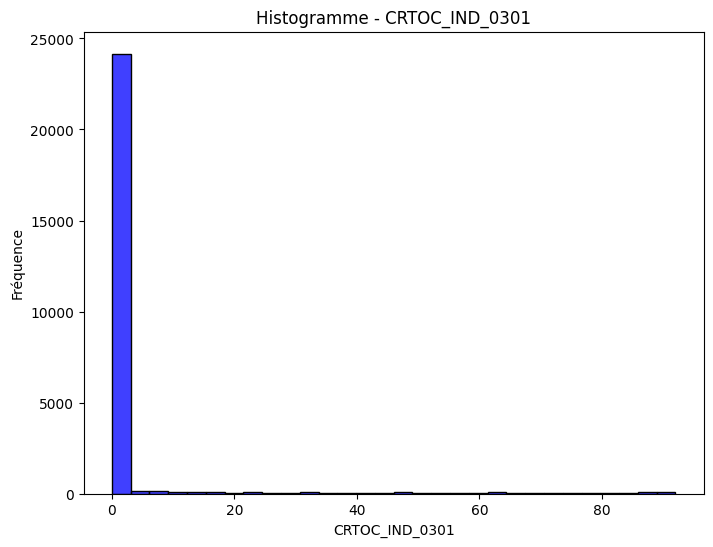

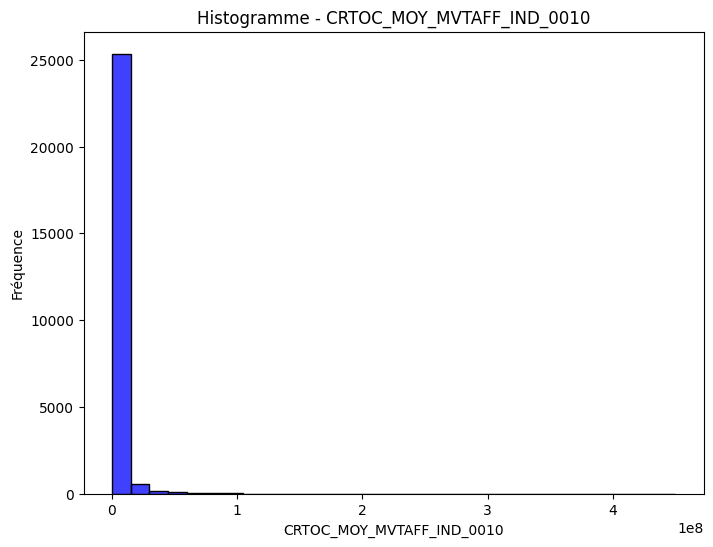

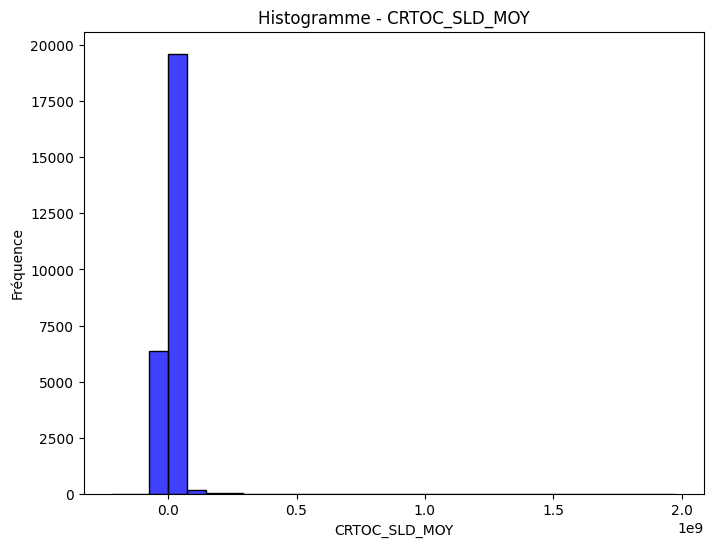

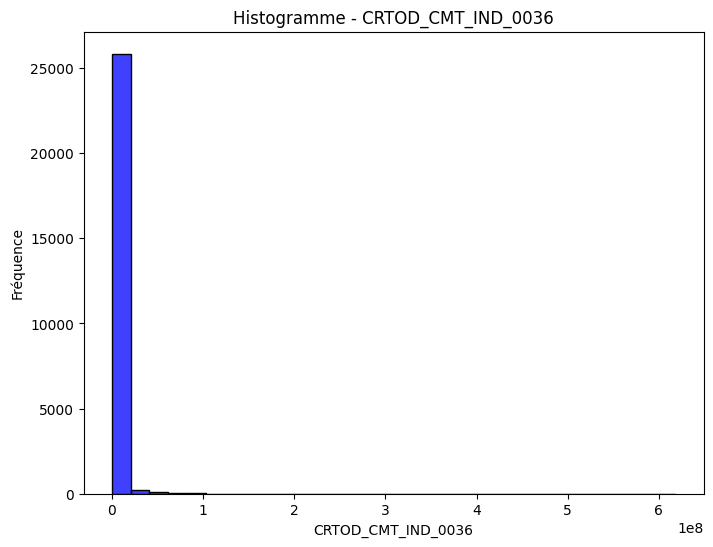

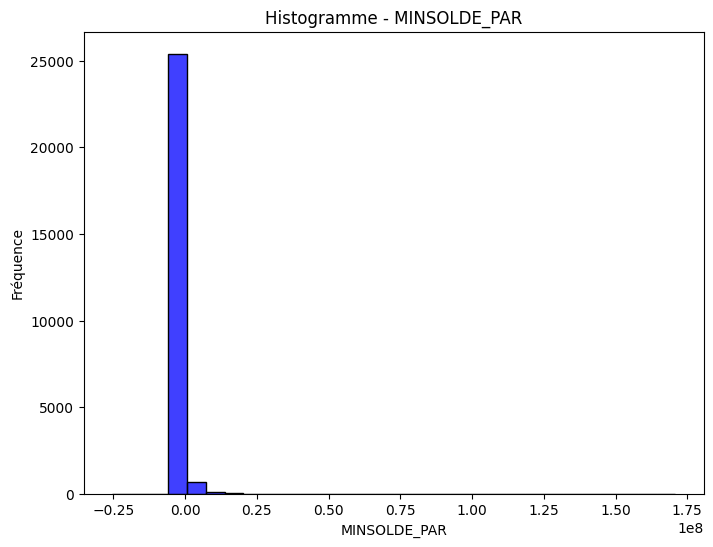

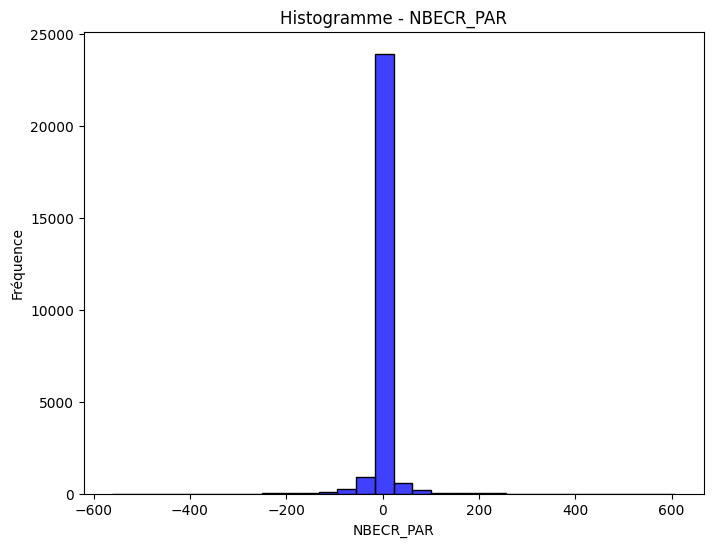

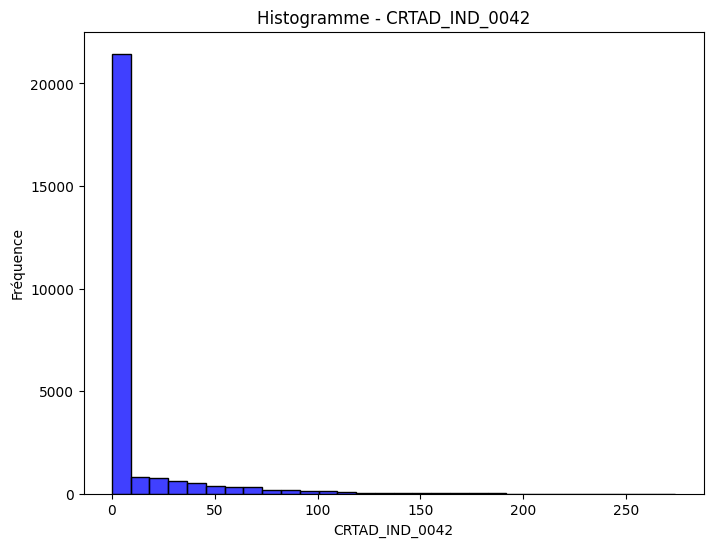

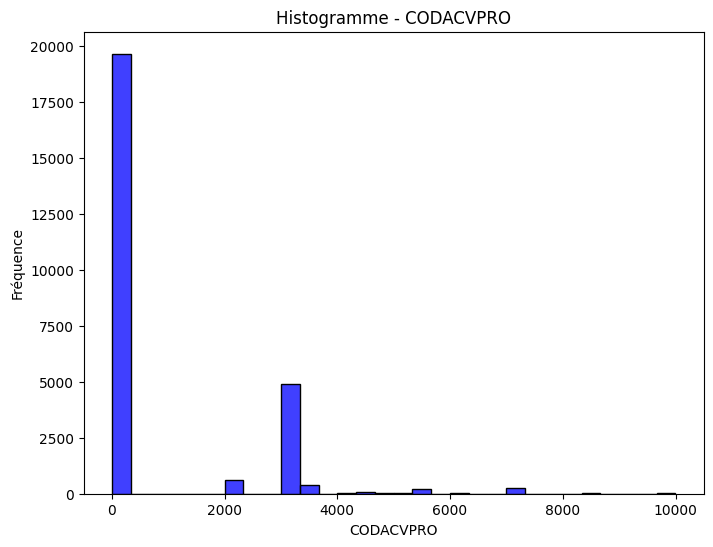

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Parcourir les colonnes numériques du dataset
for column in sample.select_dtypes(include=['float64', 'int64']).columns:
    data = sample[column].dropna()  # Supprimer les valeurs NA

    # Affichage de l'histogramme
    plt.figure(figsize=(8, 6))
    sns.histplot(data, kde=False, bins=30, color='blue')
    plt.title(f"Histogramme - {column}")
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()


### retour

In [ ]:
# def detect_outliers(series):
#     if series.dtype in ['float64', 'int64']:  # Seulement sur les colonnes numériques
#         Q1 = series.quantile(0.25)
#         Q3 = series.quantile(0.75)
#         IQR = Q3 - Q1
#         outliers = ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).sum()
#         return outliers
#     return 0

# outliers_count = sample.select_dtypes(include=['float64', 'int64']).apply(detect_outliers)
# print("\nNombre de valeurs aberrantes par colonne :")
# print(outliers_count)

# # Filtrer les colonnes avec moins de 5% d'aberrations
# outlier_threshold = len(sample) * 0.05
# columns_to_keep_outliers = outliers_count[outliers_count < outlier_threshold].index
# sample = sample[columns_to_keep_outliers]
# print(f"Variables conservées après filtrage des valeurs aberrantes : {list(columns_to_keep_outliers)}")

# # Calculer la pertinence avec la variable cible (si présente)
# if 'cible' in sample.columns:
#     correlations = sample.corrwith(sample['cible']).abs()  # Corrélation absolue
#     print("\nCorrélation avec la variable cible :")
#     print(correlations.sort_values(ascending=False))

#     # Filtrer les colonnes avec une corrélation significative (> 0.1)
#     columns_to_keep_correlation = correlations[correlations > 0.1].index
#     sample = sample[columns_to_keep_correlation]
#     print(f"Variables conservées après analyse de pertinence : {list(columns_to_keep_correlation)}")

# # Résumé final
# print("\nVariables finales conservées :")
# print(sample.columns)



Nombre de valeurs aberrantes par colonne :
DDefaut_NDB                    1574
datdelhis                         0
AGEPRS                         1437
ANCIENNETE                     1388
CODETAJUR                         0
CODITDBDF_PRO                   163
CODTYPPRS                         0
CRTAD_AG_MVTAFF_IND_0010       5131
CRTAD_AG_NBECR_A               5563
CRTAD_AG_NBECR_B               5398
CRTAD_AG_NBJDE_BA              3978
CRTAD_AG_NBJDE_BB              3081
CRTAD_AG_NBJDE_BC              2924
CRTAD_AG_SOLDE_IND_0009        5223
CRTAD_AG_SOLDE_T               5542
CRTAD_AG_SOLDE_T1              5517
CRTAD_AG_SOLDE_T2              5470
CRTAD_AG_SOLDE_T3              5433
CRTAD_AG_SOLDE_T4              5398
CRTAD_IND_0015                 2432
CRTAD_IND_0038                 5519
CRTAD_IND_0062                   24
CRTAD_IND_0205                  820
CRTAE_AG_SLDEPA                4195
CRTAR_IND_0036                 1271
CRTOC_AG_LIGCRE_2T_IND_0009    2882
CRTOC_AG_LIGCRE_IND_